# Data wrangling

In [112]:
#import helper functions and other necessary packets
from helpers_f import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
newdf=pd.read_csv("Flickrs-Switzerland-1990-2017.csv")

Extract year from datetaken and plot distribution per year

In [3]:
newdf['year']=newdf['datetaken'].map(lambda x: x[:4])

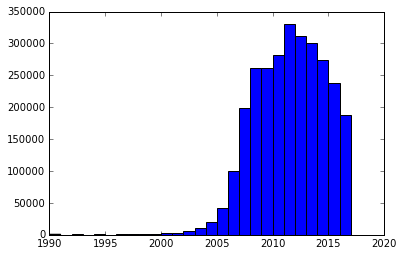

In [4]:
%matplotlib inline
plt.hist(newdf.year.astype(int),bins=np.arange(1990,2018,1))
plt.show()

We see that it is meaningful to observe only trends from 2005 to 2016 (inclusive) as most of data comes from there. We plot a closer look

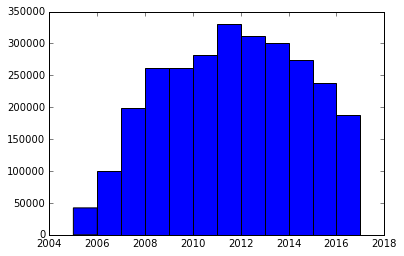

In [5]:
plt.hist(newdf.year.astype(int),bins=np.arange(2005,2018,1))
plt.show()

Get data only for the mentioned time period, extract months. We round latitude and longitude to 3 digits.

In [6]:
years_11=newdf[newdf['year'].astype(str).isin(["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"])]

In [7]:
years_11['month']=newdf['datetaken'].map(lambda x: x[5:7])

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
rounded_geo=years_11
rounded_geo['lat']=round(years_11['lat'].astype(float),3)
rounded_geo['lon']=round(years_11['lon'].astype(float),3)

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Popular place per number of pictures

In [9]:
famous_place_per_year=rounded_geo.groupby(["year","lat","lon"]).count()

In [29]:
from helpers import *
fam_places=famous_place_per_year[(famous_place_per_year.userid.isin(findmax(famous_place_per_year)))]

In [30]:
#we drop duplicates for 2008
fam_places=fam_places.reset_index().drop(fam_places.reset_index().index[[4]])

In [31]:
#display on the map
import folium
from IPython.display import HTML, display
SF_COORDINATES = (46,5)
map_2 = folium.Map(location=[46.85, 8.3], zoom_start=8)
for each in fam_places.reset_index().iterrows():
    folium.CircleMarker(location=[each[1]['lat'],each[1]['lon']], radius=each[1]['userid']*2,
                    popup=str(each[1]['year']), color='#3186cc',
                    fill_color='#C70039').add_to(map_2)
display(map_2)
map_2.save("popular_loc1.html")

In [32]:
#see what those places are, get their names
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
geolocator = Nominatim()
popular_places=[]
for index, row in fam_places.reset_index().iterrows():
    popular_places.extend([geolocator.reverse([row['lat'], row['lon']])])

In [33]:
pop_places=fam_places[['year','lat','lon','userid']]
pop_places['num_photos']=pop_places['userid']
pop_places=pop_places[['year','lat','lon','num_photos']]
pop_places['names']=getPlaceNames(popular_places)
pop_places

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,year,lat,lon,num_photos,names
0,2005,46.224,7.903,351,Staldenried
1,2006,47.256,9.109,727,Ebnat-Kappel
2,2007,47.560,7.585,1324,Basel
3,2008,46.693,6.911,4333,Romont (FR)
5,2009,46.693,6.912,3749,Romont (FR)
6,2010,47.459,8.242,1644,Mülligen
7,2011,46.235,6.119,2911,Le Grand-Saconnex
8,2012,46.693,6.911,1723,Romont (FR)
9,2013,46.168,6.119,2551,Plan-les-Ouates
10,2014,46.691,6.910,2361,Romont (FR)


We also want to check that it is based on similar number of users

In [51]:
import helpers_f
pop_places['num_users']=tuple(map(lambda lat,lon,year: getNumUsers(rounded_geo,lat,lon,year),pop_places['lat'],pop_places['lon'],pop_places['year']))

TypeError: getNumUsers() takes 3 positional arguments but 4 were given

In [22]:
pop_places

,year,lat,lon,num_photos,names,num_users
0,2005,46.224,7.903,351,Staldenried,1
1,2006,47.256,9.109,727,Ebnat-Kappel,1
2,2007,47.560,7.585,1324,Basel,2
3,2008,46.693,6.911,4333,Romont (FR),1
5,2009,46.693,6.912,3749,Romont (FR),2
6,2010,47.459,8.242,1644,Mülligen,1
7,2011,46.235,6.119,2911,Le Grand-Saconnex,18
8,2012,46.693,6.911,1723,Romont (FR),2
9,2013,46.168,6.119,2551,Plan-les-Ouates,1
10,2014,46.691,6.910,2361,Romont (FR),1


Romont is the most popular place, but we see that one users made most of these posts.<br> After checking the exact location of these posts (just someones house) we drop this user and reevaluate most popular places

In [52]:
without_bored_user=rounded_geo[rounded_geo.userid!='12359290@N04']
newFamous_plase=without_bored_user.groupby(["year","lat","lon"]).count()
new_places=newFamous_plase[(newFamous_plase.userid.isin(findmax(newFamous_plase)))]

In [53]:
#we drop duplicates for 2008
new_placec=new_places.reset_index().drop(new_places.reset_index().index[[4]])
new_placec

,year,lat,lon,userid,title,dateupload,datetaken,views,tags,place_id,woeid,month
0,2005,46.224,7.903,351,351,351,351,351,351,351,351,351
1,2006,47.256,9.109,727,727,727,727,727,727,727,727,727
2,2007,47.560,7.585,1324,215,1324,1324,1324,1324,1324,1324,1324
3,2008,46.973,7.486,1343,1343,1343,1343,1343,1343,1343,1343,1343
5,2009,46.615,7.045,1901,1901,1901,1901,1901,1899,1901,1901,1901
6,2010,47.459,8.242,1644,1644,1644,1644,1644,0,1644,1644,1644
7,2011,46.235,6.119,2911,2154,2911,2911,2911,2654,2911,2911,2911
8,2012,46.277,6.170,1689,1682,1689,1689,1689,1637,1689,1689,1689
9,2013,46.168,6.119,2551,2551,2551,2551,2551,2506,2551,2551,2551
10,2014,47.113,6.846,2117,2117,2117,2117,2117,2115,2117,2117,2117


In [54]:
#and again, we display on the map
map_3 = folium.Map(location=[46.85, 8.3], zoom_start=8)
for each in new_placec.reset_index().iterrows():
    folium.CircleMarker(location=[each[1]['lat'],each[1]['lon']], radius=each[1]['userid']*2,
                    popup=str(each[1]['year']), color='#3186cc',
                    fill_color='#C70039').add_to(map_3)
display(map_3)
map_3.save('pop_location_1.html')

As we saw before, next most popular place is Geneva (for 3 years). Let's find why is it so popular, what are the most popular tags?

In [55]:
new_most_pop_place_data=rounded_geo[((rounded_geo.lat==46.235) & (rounded_geo.lon==6.119)) |
                               ((rounded_geo.lat==46.277) & (rounded_geo.lon==6.170)) |
                               ((rounded_geo.lat==46.168) & (rounded_geo.lon==6.119))]

In [60]:
tagFreq(new_most_pop_place_data)

NameError: name 'pd' is not defined

Based on first 10 tags we see that it is because of the car salon. Let's filter only pictures that contain only tags relevant to the car salon

In [61]:
geneva_salon_data=new_most_pop_place_data[new_most_pop_place_data['tags'].str.contains("auto") |
                                    new_most_pop_place_data['tags'].str.contains("car") |
                                    new_most_pop_place_data['tags'].str.contains("auto") |
                                    new_most_pop_place_data['tags'].str.contains("motor") |
                                    new_most_pop_place_data['tags'].str.contains("show") |
                                    new_most_pop_place_data['tags'].str.contains("motorshow") |
                                    new_most_pop_place_data['tags'].str.contains("autoshow") |
                                    new_most_pop_place_data['tags'].str.contains("salon")]

Discover evolution over time of this event

In [62]:
visitors=geneva_salon_data.groupby(['year','userid']).count().reset_index().groupby("year").count()

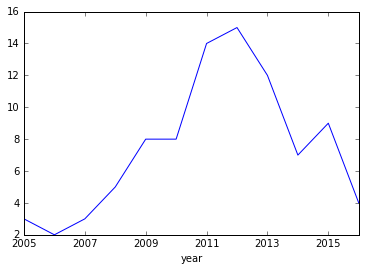

In [63]:
visitors['userid'].plot()
plt.show()
plt.savefig("number_pf_visitors_geneva.png")

We see that Geneva auto salon was the most popular in 2012. Let's now check the most popular tag per year in the data that concerns this event in order to discover the most popular cars

In [64]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2005'])

NameError: name 'pd' is not defined

We see that the most popular car in 2005 was aston martin

In [89]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2006'])

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,show,263
1,switzerland,263
2,geneva,263
3,motor,260
4,nikon,251
5,auto,244
6,geneve,244
7,autosalon,244
8,automobile,244
9,motorshow,244


Toyota was popular in 2006

In [90]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2007'])

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,geneva,333
1,switzerland,213
2,show,212
3,motor,212
4,77th,208
5,motorshow,208
6,international,207
7,auto,80
8,salon,80
9,2007,80


No popular car in 2007

In [93]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2008'])[0:50]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,auto,170
1,2008,139
2,conceptcar,117
3,car,109
4,geneva,96
5,wheel,94
6,supercar,92
7,autoshow,92
8,fashion,91
9,atelier,91


We see some renault in 2008

In [95]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2009'])[0:50]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,geneva,145
1,switzerland,135
2,ch,135
3,salondauto,97
4,genevaautoshow,97
5,auto,94
6,voiture,74
7,geneve,74
8,teewee,71
9,genève,42


BMW in 2009

In [97]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2010'])[0:50]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,car,107
1,autoshow,99
2,vehicle,89
3,carshow,87
4,voiture,86
5,geneve,86
6,vehicule,85
7,transportation,85
8,2010genevamotorshow,85
9,genfautoshow,85


Bartwillemsteinnl in 2010

In [100]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2011'])[50:80]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
50,voiture,130
51,81st,119
52,carshow,119
53,genève,116
54,porsche,95
55,beautiful,88
56,geneve,85
57,hippique,83
58,jumping,83
59,professionalphotographer,83


Porsche in 2011

In [102]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2012'])[0:50]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,geneva,1090
1,2012,1069
2,motorshow,1008
3,salon,996
4,switzerland,995
5,genf,982
6,palexpo,981
7,suisse,978
8,auto,978
9,show,961


No popular car in 2012

In [105]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2013'])[59:]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
59,worldcars,58
60,g,57
61,amg,50
62,mercedes,48
63,benz,48
64,b,48
65,s,43
66,rot,34
67,rs,33
68,w,33


Mercedes in 2013

In [106]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2014'])[0:50]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,geneva,1530
1,show,1516
2,motor,1490
3,international,1490
4,84th,1490
5,2014,1117
6,concept,329
7,mans,206
8,endurance,206
9,racing,188


Le mans legends in 2014 (didn't even know that this is a car)

In [109]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2015'])[59:]

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
59,cute,80
60,woman,80
61,df,70
62,coupé,49
63,prototype,49
64,conceptcar,49
65,awd,38
66,4wd,38
67,4x4,38
68,lamborghini,29


Lamborghini in 2015

In [110]:
tagFreq(geneva_salon_data[geneva_salon_data['year']=='2016'])

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,freq
0,2016,135
1,motorshow,111
2,racing,109
3,exclusive,108
4,supercar,108
5,international,108
6,car,108
7,retro,107
8,geneve,107
9,auto,107


Some vintage car in 2016

### Let's see some pictures

Get pictures using API

In [21]:
urls=[getUrlForTags("motorshow",46.168,6.119,2005,-1)[0]['url_m'],
      getUrlForTags("motorshow",46.235,6.119,2006,-1)[1]['url_m'],
      getUrlForTags("motorshow",46.235,6.119,2007,-1)[1]['url_m'],
      getUrlForTags("motorshow",46.235,6.119,2008,-1)[2]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2009,-1)[1]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2010,-1)[2]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2011,-1)[4]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2012,-1)[0]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2013,-1)[6]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2014,-1)[23]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2015,-1)[14]['url_m'],
      getUrlForTags("motorshow",46.168,6.119,2016,-1)[6]['url_m']
    ]

In [202]:
#save these images just in case
import urllib.request
for i in urls:
    urllib.request.urlretrieve(i, str(i.index)+".jpg")

In [71]:
df_genev=geneva_salon_data[['year','userid']].groupby('year').count().reset_index()

In [72]:
#we read files localy 
from os import listdir
from os.path import isfile,join
urls=[f for f in listdir('./geneva_salon/') if isfile(join('./geneva_salon/', f))]

In [99]:
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from skimage import io

fig, ax = plt.subplots()
fig.suptitle('Popular cars in Geneva Car Salon', fontsize=14)
ax.bar(df_genev.year.astype(int),df_genev.userid,picker=True,color='lightsalmon')

def onpick3(event):   
    artist = event.artist
     
    i=int(event.artist.get_x())
    xy=[i,df_genev[df_genev.year==str(i)]['userid']]
  
    a = io.imread(urls[i-2005],format='png')

    imagebox = OffsetImage(a, zoom=0.7)
    imagebox.image.axes = ax
    normalize=[0,0]
    if((i==2011) | (i==2014)): normalize=[-200,-150]
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(100+normalize[0],150+normalize[1]),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.3,
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
    event.canvas.draw()
    ab.remove()
        
fig.canvas.mpl_connect('pick_event', onpick3)
plt.show()
plt.savefig('geneva_bars.png')

# Popular places by number of users

In [100]:
most_users=rounded_geo.groupby(["lat","lon","year","userid"]).count()

In [101]:
user_per_loc=most_users.reset_index().groupby(['lat','lon','year'])['userid'].nunique()

In [102]:
users_per_loc=pd.DataFrame(user_per_loc).sort('userid',ascending=False).reset_index()

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [103]:
df=pd.DataFrame(index=range(2005,2017),columns=['lat','lon','userid'])
for x in range(2005,2017):
    max_num=max(users_per_loc[users_per_loc['year']==str(x)]['userid'])
    data=users_per_loc[(users_per_loc['year']==str(x)) & (users_per_loc['userid']==max_num)]
    df.set_value(x, 'lat', data['lat'].values[0])
    df.set_value(x, 'lon', data['lon'].values[0])
    df.set_value(x, 'userid', data['userid'].values[0])

Most popular place is 47.377 8.54 almost in all years. Let's see what it is

In [104]:
data_most_pop=rounded_geo[(rounded_geo.lat==47.377) & (rounded_geo.lon==8.54)]
df=pd.DataFrame(columns=['year','word','freq'])
for year in range(2005,2017):
    df=df.append(pd.DataFrame(tagFreq(data_most_pop[data_most_pop.year==str(year)],year)),ignore_index=True)

NameError: name 'pd' is not defined

In [105]:
pop_tags_for_pop_location_per_year=df[(df.word!="zurich") & (df.word!="zürich")& (df.word!="swiss")& (df.word!="schweiz")
   & (df.word!="suisse")& (df.word!="switzerland") & (df.word!="svizzera") & (df.freq>5)].set_index(["year","freq"])
pop_tags_for_pop_location_per_year

,,word
year,freq,


In [35]:
#pictures are manually chosen
df=users_per_loc[(users_per_loc.lat==47.377) & (users_per_loc.lon==8.54)][['year','userid']]
urls=[getUrlForTags("bahnhofstrasse",47.377,8.54,2005,-1)[0]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2006,-1)[5]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2007,-1)[2]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2008,-1)[9]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2009,-1)[4]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2010,-1)[2]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2011,-1)[0]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2012,-1)[0]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2013,-1)[1]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2014,-1)[9]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2015,-1)[5]['url_m'],
        getUrlForTags("bahnhofstrasse",47.377,8.54,2016,-1)[54]['url_m']]

In [19]:
#save images just in case
for i in urls:
    urllib.request.urlretrieve(i, str(i.index)+"zurich.jpg")

NameError: name 'urls' is not defined

In [106]:
#we read files localy 
from os import listdir
from os.path import isfile,join
urls=[f for f in listdir('./train_station/') if isfile(join('./train_station/', f))]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from skimage import io

fig, ax = plt.subplots()
fig.suptitle('Zurich train station over time\nClick on the bar to display a picture', fontsize=14)
ax.bar(df.year.astype(int),df.userid,picker=True,color='lightsalmon')

def onpick3(event):   
    artist = event.artist
     
    i=int(event.artist.get_x())
    xy=[i,df[df.year==str(i)]['userid']]
  
    a = io.imread(urls[i-2005],format='png')

    imagebox = OffsetImage(a, zoom=0.7)
    imagebox.image.axes = ax
    normalize=[0,0]
    if((i>2009) & (i<2014)): normalize=[-200,-150]
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(100+normalize[0],150+normalize[1]),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.3,
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
    event.canvas.draw()
    ab.remove()
        
fig.canvas.mpl_connect('pick_event', onpick3)
plt.show()


# Number of posts per month, daytime

In [108]:
newdf=rounded_geo
newdf['time']=newdf['datetaken'].map(lambda x: datetime.datetime.strptime(x[11:],'%H:%M:%S').time())

In [113]:
newdf['daytime']=newdf['time'].map(lambda x: daytime(x))

NameError: name 'datetime' is not defined

In [13]:
newdf.groupby(['daytime']).count()[['userid']]

,userid
daytime,
afternoon,1379243
evening,548584
morning,682812
night,178844


In [14]:
newdf['month']=newdf['datetaken'].map(lambda x: x[5:7])
perDayTime=newdf.groupby(['month','daytime']).count()[['userid']].reset_index()

In [22]:
perDayTime.pivot_table(index='month', columns='daytime', values='userid',
                aggfunc='sum', fill_value=0).plot.bar(stacked=True)

In [23]:
%matplotlib inline
plt.show()
#plt.savefig("daytime.png")

# Word cloud per canton

In [115]:
import pickle
# this is to load from pickled data
with open('./data/df3.pickle', 'rb') as handle:
    cantons = pickle.load(handle)

In [116]:
loc_tags=newdf[['tags','lat','lon']]

In [117]:
loc_tags['location']= newdf.iloc[0:newdf.shape[0]-1, 6:8].apply(lambda x: str(x[0]) + ', ' + str(x[1]), axis=1)

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [118]:
loc_tags=loc_tags[['tags','location']]

In [119]:
loc_tags=loc_tags.dropna()

In [120]:
frame=loc_tags.groupby('location')['tags'].sum()

In [9]:
tags_per_loc=pd.DataFrame(frame)

In [10]:
cantons_tags=cantons.set_index('location').join(tags_per_loc).reset_index()[['canton','tags']]

In [11]:
grouped_ca=cantons_tags.dropna().groupby('canton').sum()

In [12]:
only_swiss=grouped_ca.drop(['Auvergne-Rhône-Alpes','Baden-Württemberg','Bourgogne-Franche-Comté','Grand-Est','Hauts-de-France',
                'LOM','PIE','TAA','Tirol','VDA','VEN','Vorarlberg'])

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from os import path
from scipy.misc import imread
from matplotlib import colors as mcolors
import six
import random
          
def color_f(word, font_size, position, orientation, random_state=None, **kwargs):
        if(count*10)<100:
            color_pal='rgb('+str(count*10)+'%%,'+str(int(100/(count+1)))+'%%,%d%%)'
        else:
            color_pal='rgb('+str(int(100/3*(count+1)))+'%%,'+str(count*3)+'%%,%d%%)'
        return color_pal % random.randint(0, 30)


exclude=['switzerland', 'schweiz', 'suisse', 'svizzera', 'svizra', 'suiza', ',europe','europe','geo',',geo', 'lon', 'lat', 
                   'img', 'ch', 're', 'jpg', 'dsc', 'che', 've', 'in', 'the', 'zrh','fr', 'the', 'for', 'mm', 'geolon', 
                   'geolat', 'swiss', 'swis', 'nikon','europa','photo','photographe','geotagged','analog','analogue','canon','fuji','fujifilm','film',
        'canton', 'kanton', 'city', 'ville', 'country', 'geneve', 'gva', 'town', 'd40', 'd700', 'd4', '400d', '8800f', '35mm', 'f28', 's6000fd', 's6500fd']
for word in exclude:
    STOPWORDS.add(word)
    
count=0
for name in only_swiss.index.values:
    mymask = imread("./cantons/maps/"+name+".png",flatten=True)
    wc = WordCloud(background_color='white', max_words=2000, mask=mymask,stopwords=STOPWORDS).generate(only_swiss.ix[name]['tags'])
    plt.imshow(wc.recolor(color_func=color_f,random_state=count))
    count=count+1
    plt.axis('off')
    plt.savefig('./clouds/'+name+'2.png', dpi=300,transparent=True)


/home/nevena/anaconda3/lib/python3.5/site-packages/wordcloud/wordcloud.py:286: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


In [122]:
from IPython.display import Image
from IPython.display import display
from IPython.display import HTML
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./word_clouds/') if isfile(join('./word_clouds/', f))]
    
imagesList=''.join( ["<img style='width: 320px; margin: -30px; float: left;' src='%s' />" % str("./clouds/"+s) 
                 for s in onlyfiles ])
display(HTML(imagesList))

# Bubbles

In [3]:
def fill_nan(tag, title):
    '''we check first if the tag is null, to which case we fill it with its non-nan corrresponding title'''
    if((str(tag) == 'none') or (str(tag) == 'nan')):
        if((str(title) != 'none') and ( str(title) != 'nan')):
            return title
    else:
        #We append the title to the tags in order to, optimistically get more relevant informations
        if((str(title) != 'none') and ( str(title) != 'nan')):
            return tag + ' ' + title
        return tag

In [4]:
data=newdf

In [5]:
data.dropna(subset=['userid','tags'], how='all', inplace= True)

In [6]:
data['tags'] = data[['title', 'tags']] \
                        .apply(lambda x : fill_nan(str(x['tags']), str(x['title'])), axis=1)

In [8]:
#keep only the relevent columns
data = data[['userid', 'datetaken', 'views', 'tags', 'lat', 'lon']]
data =data.ix[1:]

In [9]:
import re
def preprocessor(tags):
    
    if('=' in tags):
        m = re.search('(?<==).*', tags)
        tags = m.group(0)
    tags = re.sub('[^?a-zA-Z \n]', ' ', tags.lower())
    tags = re.sub(r'(  +|\n)', " ", tags) 
    tags = re.sub(r'(\?+)', "", tags) 
    remove_words =['switzerland', 'schweiz', 'suisse', 'svizzera', 'svizra', 'suiza', 'europe' 'geo', 'lon', 'lat', 
                   'img', 'ch', 're', 'jpg', 'dsc', 'che', 've', 'in', 'the', 'zrh','fr', 'the', 'for', 'mm', 'geolon', 
                   'geolat']
    tags = ' '.join([word for word in tags.split(' ') if ((not len(word) == 1) & (not word in remove_words))])
    tags = re.sub(r'(^(  ?)|(  ?)$)', '', tags)
    if (len(tags) == 0): return np.nan
    return tags

In [10]:
data['tags'] = data.tags.apply(lambda x: preprocessor(str(x)))

In [11]:
#credits to olga
import pickle
with open('./df3.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [12]:
mapping = pd.DataFrame(d[['canton']])
mapping.index = d.location

In [13]:
cantonDict = mapping.to_dict()
cantonDict = cantonDict.get('canton')

In [14]:
abbr = dict([('Aargau', 'AG'), 
      ('Appenzell Ausserrhoden', 'AR'), 
      ('Appenzell Innerrhoden', 'AI'), 
      ('Basel-Landschaft', 'BL'), 
      ('Basel-Stadt', 'BS'), 
      ('Bern - Berne', 'BE'), 
      ('Fribourg - Freiburg', 'FR'), 
      ('Genève', 'GE'), 
      ('Glarus', 'GL'), 
      ('Graubünden - Grigioni - Grischun', 'GR'), 
      ('Jura', 'JU'), 
      ('Luzern', 'LU'), 
      ('Neuchâtel', 'NE'), 
      ('Nidwalden', 'NW'), 
      ('Obwalden', 'OW'), 
      ('Schaffhausen', 'SH'), 
      ('Schwyz', 'SZ'), 
      ('Solothurn', 'SO'), 
      ('Sankt Gallen', 'SG'), 
      ('Thurgau', 'TG'), 
      ('Ticino', 'TI'), 
      ('Uri', 'UR'), 
      ('Valais - Wallis', 'VS'), 
      ('Vaud', 'VD'), 
      ('Zug', 'ZG'), 
      ('Zürich', 'ZH')
     ])

In [15]:
def getAbbr(x):
    if abbr.get(x) is not None:
        return abbr.get(x)
    else:
        return 'other' #the ones not in Switzerland

In [16]:
def mapCanton(row):
    lat = row[0]
    lon = row[1]
    coordinate_long = str(lat)+", "+str(lon)
    x = cantonDict.get(coordinate_long)
    if x is not None:
        return getAbbr(x)
    else:
        lat = round(float(row[0]),3)
        lon = round(float(row[1]),3)
        coordinate_short = str(lat)+", "+str(lon)
        y = cantonDict.get(coordinate_short)
        if y is not None:
            return getAbbr(y)
        else:
            return y #we need y in order to see None

In [17]:
data['canton'] = 'none'
data['canton'] = data[['lat', 'lon']].apply(mapCanton, axis= 1)
data = data[(pd.notnull(data.canton))&(data.canton != 'other')]

In [18]:
data['year']= data['datetaken'].map(lambda x: x[:4])
data['month']= data['datetaken'].map(lambda x: x[5:7])

In [19]:
data['year'] = data.year.astype(int)
data['views'] = data.views.astype(int)
data['month'] = data.month.astype(int)
#drop rows whose both title and tags are null
data.dropna(subset=['tags'], how='any', inplace= True)
data = data.loc[(data.year > 2004) & (data.tags != "nan") & (data.tags != "none")]

In [20]:
data1 = data.copy()

In [21]:
data_co = data.groupby("canton")['userid'].count()
plt.style.use('ggplot')
_ = data_co.plot.pie(figsize=(10, 10))

In [23]:
top5_canton = data_co.to_frame()
top5_canton.sort(['userid'], ascending=[False], inplace=True)

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [22]:
cantons = list(top5_canton.head(5).index.values.astype(str))
cantons

NameError: name 'top5_canton' is not defined

In [24]:
#get the top 10 tags
def top_10_tags(df):
    return df.head(15)


def preprocessor_2(tags):
    
    remove_words =['switzerland', 'schweiz', 'suisse', 'svizzera', 'svizra', 'suiza', 'europe' 'geo', 'lon', 'lat', 
                   'img', 'ch', 're', 'jpg', 'dsc', 'che', 've', 'in', 'the', 'zrh','fr', 'the', 'for', 'mm',
                   'europe', 'wallis', 'geolon', 'geolat', 'geneva', 'geneve', 'gen', 'genf', 'ginebra', 'ginevra', 'exif',
                   'gva', 'de', 'vaud', 'valais','vallis', 'zurich', 'rich', 'imag', 'europe', 'zuerich', 'zu', 'geo', 'zuerich',
                   'Bern', 'Berne', 'bern', 'berne' 'swiss']
    tags = ' '.join([word for word in tags.split(' ') if ((not len(word) < 3) & (not word in remove_words))])
    tags = re.sub(r'(^(  ?)|(  ?)$)', '', tags)
    if (len(tags) == 0): return np.nan
    return tags

In [26]:
df = pd.DataFrame(index=list(abbr.keys()), columns=np.arange(2005, 2017, 1))

In [27]:
data = data1.copy()

In [28]:
data['year']=data['datetaken'].map(lambda x: x[:4])

In [29]:
for canton in list(abbr.values()):
    for year in np.arange(2005, 2017, 1):
        top_10 = top_10_tags(tagFreq(data[(data.canton == canton) & (data.year == str(year))]))
        index = list(abbr.keys())[list(abbr.values()).index(canton)]
        df.ix[index, year] = preprocessor_2(' '.join(top_10.word.values))


/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly as plotly
plotly.tools.set_credentials_file(username='nhallxd', api_key='218crnnLi3oOMTM9ICDV')
import plotly.plotly as py
import plotly.graph_objs as go

import pickle
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 
path = "./"
from subprocess import check_output
#print(check_output(["ls", data_path]).decode("utf8"))

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [31]:
num_per_canton_year=data1.groupby(["canton","year"]).count()

In [32]:
num_per_canton_year=num_per_canton_year.reset_index()

In [33]:
only_per_canton=data1.groupby(["canton"]).count()

In [34]:
only_per_canton=only_per_canton.sort(["userid"],ascending=True).reset_index()

In [40]:
data=[]
for ab in list(abbr.values()):
    index = list(abbr.keys())[list(abbr.values()).index(str(ab))]
    val = list(df[df.index == index].values[0])
    sizes=num_per_canton_year[(num_per_canton_year['canton']==str(ab))]['userid']
    sizes=sizes.map(lambda x: x/50)
    y_value=only_per_canton[only_per_canton['canton']==str(ab)].index.tolist()[0]
    #print(list(map(lambda x: str(x) + '<br>', val)),"           end")
    trace0 = go.Scatter(
        x= df.columns.values,
        y= np.arange(10+(y_value*50), 23+(y_value*50), 1),
        text=list(map(lambda x: " ".join(x.split(" ")[:5]), val)),
        #list(map(lambda x: str(x.split(" ")[:5]), val))[0],
        name= index,
        mode='markers',
        marker=dict(
            size=sizes,
            sizemode='area'
        )
    )
    data.extend([trace0])
layout = go.Layout(
    autosize=False,
    width=1000,
    height=700,
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='nlack'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    yaxis=dict(
        title='Popularity of a canton',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Trend')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~nhallxd/0 or inside your plot.ly account where it is named 'Trend'
